In [1]:
# Imports
import pandas as pd
import numpy as np

from nba_api.stats.static import players
from nba_api.stats.static import teams 

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',250)

In [2]:
# Creating a DataFrame with all NBA players
player_dict = players.get_players()
players = pd.DataFrame(player_dict)
print("Total of players:",players.shape[0])
players.head()

Total of players: 4723


,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False


In [3]:
# Finding LeBron James
lebronId = players.id[players.full_name == 'LeBron James'].to_list()[0]
display(players[players.full_name == 'LeBron James'])

,id,full_name,first_name,last_name,is_active
2033,2544,LeBron James,LeBron,James,True


In [4]:
# Fetching All LeBron Stats
from nba_api.stats.endpoints import playercareerstats
lebronCareer = playercareerstats.PlayerCareerStats(player_id = lebronId)
lebronCareer = lebronCareer.get_data_frames()[0]
lebronCareer

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2544,2003-04,00,1610612739,CLE,19.0,79,79,3120.0,622,1492,0.417,63,217,0.290,347,460,0.754,99,333,432,465,130,58,273,149,1654
1,2544,2004-05,00,1610612739,CLE,20.0,80,80,3388.0,795,1684,0.472,108,308,0.351,477,636,0.750,111,477,588,577,177,52,262,146,2175
2,2544,2005-06,00,1610612739,CLE,21.0,79,79,3361.0,875,1823,0.480,127,379,0.335,601,814,0.738,75,481,556,521,123,66,260,181,2478
3,2544,2006-07,00,1610612739,CLE,22.0,78,78,3190.0,772,1621,0.476,99,310,0.319,489,701,0.698,83,443,526,470,125,55,250,171,2132
4,2544,2007-08,00,1610612739,CLE,23.0,75,74,3027.0,794,1642,0.484,113,359,0.315,549,771,0.712,133,459,592,539,138,81,255,165,2250
5,2544,2008-09,00,1610612739,CLE,24.0,81,81,3054.0,789,1613,0.489,132,384,0.344,594,762,0.780,106,507,613,587,137,93,241,139,2304
6,2544,2009-10,00,1610612739,CLE,25.0,76,76,2966.0,768,1528,0.503,129,387,0.333,593,773,0.767,71,483,554,651,125,77,261,119,2258
7,2544,2010-11,00,1610612748,MIA,26.0,79,79,3063.0,758,1485,0.510,92,279,0.330,503,663,0.759,80,510,590,554,124,50,284,163,2111
8,2544,2011-12,00,1610612748,MIA,27.0,62,62,2326.0,621,1169,0.531,54,149,0.362,387,502,0.771,94,398,492,387,115,50,213,96,1683
9,2544,2012-13,00,1610612748,MIA,28.0,76,76,2877.0,765,1354,0.565,103,254,0.406,403,535,0.753,97,513,610,551,129,67,226,110,2036


In [5]:
#Creating a column with a cumulative sum on PTS
lebronCareer['SUM_PTS'] = lebronCareer['PTS'].cumsum()

In [6]:
lebronCareer.tail()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,SUM_PTS
15,2544,2018-19,00,1610612747,LAL,34.0,55,55,1937.0,558,1095,0.510,111,327,0.339,278,418,0.665,57,408,465,454,72,33,197,94,1505,32543
16,2544,2019-20,00,1610612747,LAL,35.0,67,67,2316.0,643,1303,0.493,148,425,0.348,264,381,0.693,66,459,525,684,78,36,261,118,1698,34241
17,2544,2020-21,00,1610612747,LAL,36.0,45,45,1504.0,422,823,0.513,104,285,0.365,178,255,0.698,29,317,346,350,48,25,168,70,1126,35367
18,2544,2021-22,00,1610612747,LAL,37.0,56,56,2084.0,640,1221,0.524,161,448,0.359,254,336,0.756,63,396,459,349,73,59,196,121,1695,37062
19,2544,2022-23,00,1610612747,LAL,38.0,44,44,1603.0,510,1004,0.508,97,308,0.315,211,276,0.764,51,322,373,309,43,24,138,72,1328,38390


In [7]:
print("Total Scores of LeBron until today:",lebronCareer.SUM_PTS.max())

Total Scores of LeBron until today: 38390


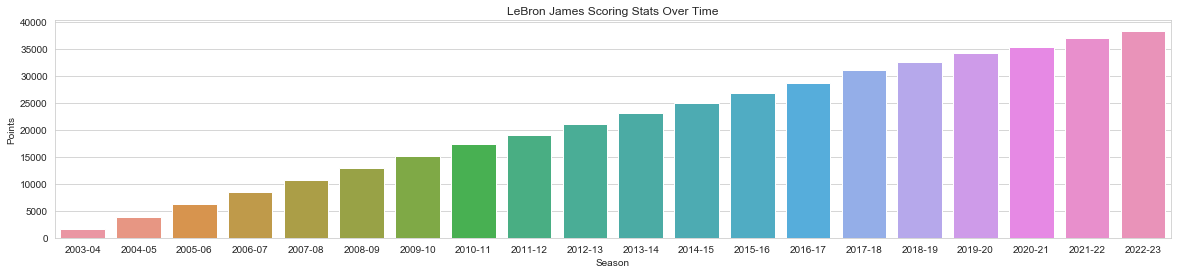

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,4))
c = sns.barplot(data = lebronCareer, x='SEASON_ID',y='SUM_PTS')
plt.xlabel('Season')
plt.ylabel('Points')
plt.title('LeBron James Scoring Stats Over Time')
plt.show(c)